In [24]:
import numpy as np
import pandas as pd

In [25]:
dataset=pd.read_csv('salary.csv')

In [26]:
print(dataset.head(5))
print(dataset.shape)

   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
(32561, 5)


# Mapping Salary into binary values

In [28]:
import math
income_set = set(dataset['income'])
# dataset['income'] = dataset['income'].map({'<=50k': 0, '>50k': 1}).astype(int)
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

dataset['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [30]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [31]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

# Finding K value
To find the k value we will first find the mean error

Text(0, 0.5, 'Mean Error')

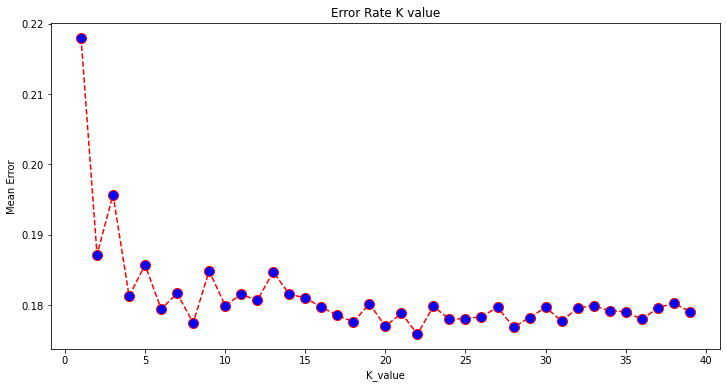

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)  #Default nearest neighbors are 5
    model.fit(X_train,y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle="dashed",marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate K value")
plt.xlabel('K_value')
plt.ylabel("Mean Error")

# Training

In [99]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=22,metric='minkowski',p=2)   #P=2 means we are chosing Eucledian distance
                                                                    #to find distance bw data points
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

# Predicting

In [100]:
age=input("Employees Age ")
education=int(input("Employees Education "))
cg=int(input("Capital gain "))
wh=int(input("weaks per hour "))
newEmp=[[age,education,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result==1:
    print("Customer might have salary greater than 50k")
else:
    print("No the customer might not have salary greater than 50k")

Employees Age 
Employees Education 


ValueError: invalid literal for int() with base 10: ''

# Predicting the test data set

In [101]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [102]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_test,y_pred)
print("confusion matrix: ")
print(cm)

print(f"\n\nAccuracy score of the model is {accuracy_score(y_test,y_pred)*100}")

confusion matrix: 
[[5918  275]
 [1157  791]]


Accuracy score of the model is 82.41002333865617
